### 1. Poisson

In this notebook we will discuss the poisson distribution


In [5]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def plot(y_func, x_axis, y_axis, title, x_start=0.0, x_end=1.0, ):
    x = np.linspace(x_start,x_end, num=200, endpoint=True)
    y = y_func(x)
    fig, ax = plt.subplots()
    ax.set(xlabel=x_axis, ylabel=y_axis, title=title)
    ax.plot(x, y)

##### 1.1 Problem Scenario

We are helping to optimize an e-commerce operation. We are asked to create estimations about the number of orders arriving in an hour? 

We decided to create a random variable X where:

$$ X = \text{# of orders created in one hour} $$

#### Assumptions

- We are assuming that all hours is similar in respect of number of orders.

- We also, assume that the likelihood of receiving an order within any particular minute is constant.

  Ex: Average order at minute '1' is very close to orders at minute 'm' for m<>1.
  
- Number of orders on hour 'h' is independent to the number of orders on hour h+1
  

#### Observe and record the average for 1 hour

We monitor the orders for some an hour and get the average number of orders .

$$ E(X) = \lambda = 35.5 \text{ orders} $$ 

#### Modeling using binomial distribution

Let's try to model $\lambda$ using the binomial distribution.

Each experiment is the event of receiving an order at a partibular minute.

$$E(X) = \lambda = \text{Number of trials} * p(Success) $$

We know that:

a) Number of trials = 60 (sixty minutes in one hour)

b) p(Success) = $ \frac{\lambda}{60} $


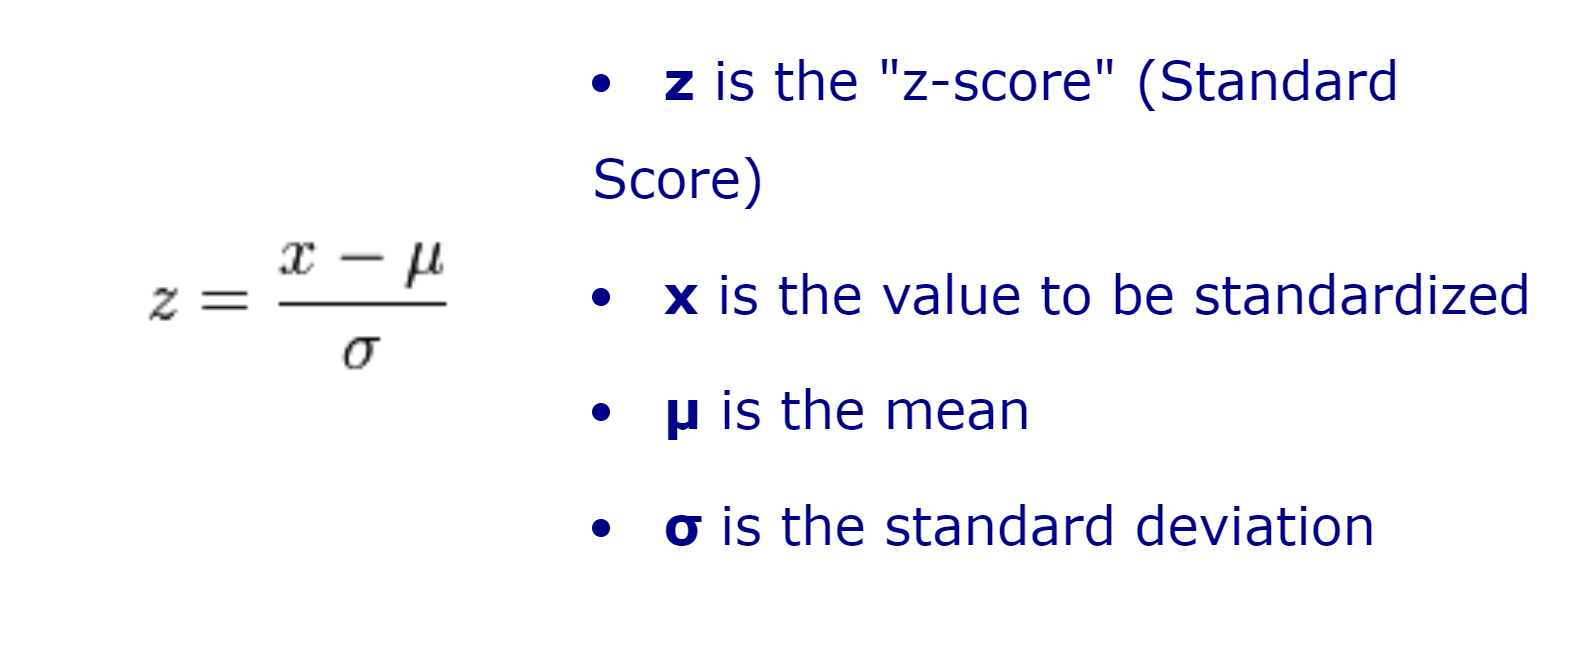

Relation between the area under the curve and z-score

The probability that the number of orders in one hour is k is defined by:

$$ p(X = k) = \binom{60}{k} (\frac{\lambda}{60})^k (1 - \frac{\lambda}{60})^{60-k}
$$

This seems to be a good estimate, but what if two orders arive at the same minute?

Our intuition would be to reduce the period to seconds.

Then the formula would be:

$$ p(X = k) \approx \binom{3600}{k} (\frac{\lambda}{3600})^k (1 - \frac{\lambda}{3600})^{3600-k}
$$

We are getting close, but there is still the possibility of having two orders arriving at the same second.

The general formulat is:

$$ p(X = k) \approx \binom{N}{k} (\frac{\lambda}{N})^k (1 - \frac{\lambda}{N})^{N-k}
$$

To be precise we want to calculate the limit when the number of periods 'n' is very large.

$$ p(X = k) = \lim_{n \to \infty} \binom{n}{k} (\frac{\lambda}{n})^k (1 - \frac{\lambda}{n})^{n-k} $$

Remember from the previous sessions:

$$ \frac{x!}{(x-k)!} = (x) * (x-1) ... (x-k+1) $$

The expession above has k elements.

$$ p(X = k) = \lim_{n \to \infty} \binom{n}{k} (\frac{\lambda}{N})^k (1 - \frac{\lambda}{N})^{N-k} $$

$$ p(X = k) = \lim_{n \to \infty} \frac{n!}{(n-k)!k!} (\frac{\lambda^k}{n^k}) (1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k} $$

$$ p(X = k) = \lim_{n \to \infty} \frac{(x) * (x-1) ... (x-k+1)}{k!} (\frac{\lambda^k}{n^k}) (1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k} $$

Exchange the denominators of first and second terms.

$$ p(X = k) = \lim_{n \to \infty} \frac{(x) * (x-1) ... (x-k+1)}{n^k} (\frac{\lambda^k}{k!}) (1 - \frac{\lambda}{n})^{n}(1 - \frac{\lambda}{n})^{-k} $$

The limit of a multiplication is the multiplication of the limits.

$$ p(X = k) = \lim_{n \to \infty} A * B * C * D $$

$$ p(X = k) = \lim_{n \to \infty} A * \lim_{n \to \infty} B * \lim_{n \to \infty} C * \lim_{n \to \infty} D $$

Now solving each term indenpendently

Solving A

$$ \lim_{n \to \infty} A = \frac{(n) * (n-1) ... (n-k+1)}{n^k} $$

When 'n' approaches infinity the higher order term dominate

$$ \lim_{n \to \infty} A = \frac{(1 . n^k) (c_{2} . n^{k-1}) ... (c_{k} . n^1)}{n^k} = 1 $$

$$ \lim_{n \to \infty} A = 1 $$

Solving B

Since B is not a function of 'n', the limit is the value.

$$ \lim_{n \to \infty} B = \lim_{n \to \infty} \frac{\lambda^k}{k!} = \frac{\lambda^k}{k!} $$

Solving C

Before solving C we should remember that:

$$ \lim_{x \to \infty} ({1 + \frac{c}{x}})^x = e^c$$ 

So 

$$ \lim_{n \to \infty} C = \lim_{n \to \infty}(1 - \frac{\lambda}{n})^{n} = e^{-\lambda} $$

Solving D

$$ \lim_{n \to \infty} D = (1 - \frac{\lambda}{n})^{-k} $$

Notice that $ \frac{\lambda}{n} $ will approach zero as n grows to infinity.

$$ \lim_{n \to \infty} D = (1 - 0)^{-k} = 1 $$


Putting everything back together we have:

$$ p(X = k) = \lim_{n \to \infty} A * \lim_{n \to \infty} B * \lim_{n \to \infty} C * \lim_{n \to \infty} D $$

$$ p(X = k) = 1 * \frac{\lambda^k}{k!} * e^{-\lambda} * 1 $$

$$ p(X = k) = \frac{\lambda^k}{k!} e^{-\lambda}  $$

Going back from our initial formula..

$$ p(X = k) = \lim_{n \to \infty} \binom{n}{k} (\frac{\lambda}{n})^k (1 - \frac{\lambda}{n})^{n-k} =  \frac{\lambda^k}{k!} e^{-\lambda} $$


In [2]:
# Scipy example for z-score for elements of numpy array
values = [0.7972,  0.0767,  0.4383,  0.7866,  0.8091, 
          0.1954,  0.6307,  0.6599,  0.1065,  0.0508]
arr_values = np.array(values)
print('Original values:')
print(values)
print('\nZ-scores values:')
print(np.around(stats.zscore(arr_values), 3))

Original values:
[0.7972, 0.0767, 0.4383, 0.7866, 0.8091, 0.1954, 0.6307, 0.6599, 0.1065, 0.0508]

Z-scores values:
[ 1.127 -1.247 -0.055  1.092  1.166 -0.856  0.579  0.675 -1.149 -1.332]


In [3]:
# Calculate zcores of a single value using an array representing the distribution. 

def z_score(arr_values, value):
    standard_deviation = np.std(values)
    mean = np.mean(values)
    return (value - mean) / standard_deviation

print(z_score(values, 0.5))

0.14789166175062818


**Example 1**

A basketball player traditionally makes 85% of her free throws. Suppose she shoots 10 baskets and counts the number she makes. What is the probability that she makes 8 baskets?


$p = 0.85$

$q = 1-0.85 = 0.15$, 

$n=10$ and $k=8$.

The probability 8 successes out of 10 = 

$10C8 * (0.85)^8 * (0.15)^2$ = 

= $\frac{10!}{(10-8)! * 8!} * (0.85)^8*(0.15)^2 = 0.2759 =$

= $27.59\%$

In [6]:
# Calculation Example 1
ex_1_answer = n_choose_k(10, 8) * math.pow(0.85, 8) * math.pow(0.15, 2)
print_result('Answer example 1', ex_1_answer)

Answer example 1 = 27.59%



To facilitate our calculation, we will make a substitution:

$x = (n * c) $ that gives $ \frac{1}{n} = \frac{c}{x} $

$$ \lim_{n \to \infty} ({1 + \frac{1}{n}})^{n*c} $$ 

$$ (\lim_{n \to \infty} ({1 + \frac{1}{n}})^{n})^{c} $$ 

We know that:

$$ \lim_{n \to \infty} ({1 + \frac{1}{n}})^{n} = e$$ 

So:
$$ (\lim_{n \to \infty} ({1 + \frac{1}{n}})^{n})^{c} = e^c$$

